The dataset which is used here is the World Population Dataset and can be downloaded from here: https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis/input

Let's make the necessary imports and set the display as max columns to display all the columns neatly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

Let's import the World Population Dataset and print some records

In [3]:
df = pd.read_csv('world_population_data.csv', encoding='utf-8')
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


Let's check the datatypes of each column

In [4]:
df.dtypes

rank                  int64
cca3                 object
country              object
continent            object
2023 population       int64
2022 population       int64
2020 population       int64
2015 population       int64
2010 population       int64
2000 population       int64
1990 population       int64
1980 population       int64
1970 population       int64
area (km²)          float64
density (km²)         int64
growth rate          object
world percentage     object
dtype: object

Get a summary of the categorical data

In [34]:
# Generate a summary of descriptive statistics for categorical data in the DataFrame
categorical_summary = df.describe(include=['O']).transpose()

# Print a summary of categorical data
print('Summary of categorical data:')
categorical_summary

Summary of categorical data:


,count,unique,top,freq
cca3,234,234,IND,1
country,234,234,India,1
continent,234,6,Africa,57


Check for missing values

In [33]:
# Check for missing values in each column of the DataFrame
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print('Missing values in each column:', missing_values)

Missing values in each column: rank                0
cca3                0
country             0
continent           0
2023 population     0
2022 population     0
2020 population     0
2015 population     0
2010 population     0
2000 population     0
1990 population     0
1980 population     0
1970 population     0
area (km²)          0
density (km²)       0
growth rate         0
world percentage    0
dtype: int64


Check for duplicate rows

In [32]:
# Count the number of duplicate rows in the DataFrame
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print('Number of duplicate rows:', duplicate_rows)

Number of duplicate rows: 0


Let's find the top 10 countries with largest population

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'India'),
  Text(1, 0, 'China'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Nigeria'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Bangladesh'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Mexico')])

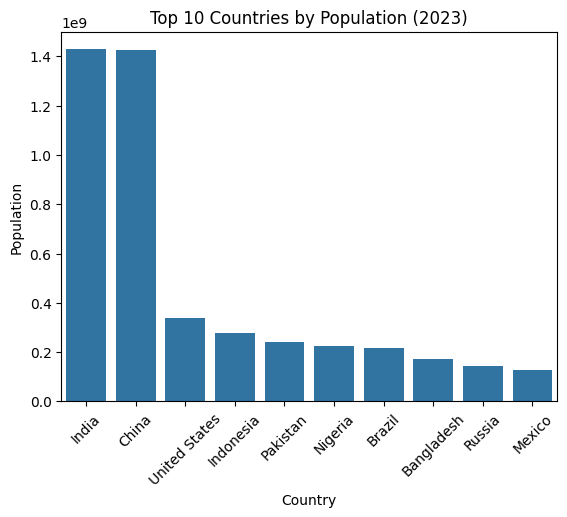

In [31]:
# Select the top 10 countries with the largest population for the year 2023
top_10_countries_population = df.nlargest(10, '2023 population')

# Plotting a bar chart using Seaborn to visualize the population of the top 10 countries in 2023
sns.barplot(x='country', y='2023 population', data=top_10_countries_population)

# Setting the title of the plot
plt.title('Top 10 Countries by Population (2023)')

# Adding labels to the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Population')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Convert the data types of the attributes 'world percentage' and 'growth rate' from object to float and strip off the '%' character which makes it sutable for our analysis

In [30]:
try:
    # Attempt to strip the percentage sign and convert 'growth rate' column to float
    df['growth rate'] = df['growth rate'].str.rstrip('%').astype('float') 
    
    # Attempt to strip the percentage sign and convert 'world percentage' column to float
    df['world percentage'] = df['world percentage'].str.rstrip('%').astype('float') 
except AttributeError:
    # Handle AttributeError in case the columns are already in the correct format
    pass

Let's the print summary statistics for the attribute growth rate.

If we can observe from previous outputs, we can see that growth rate contains '%' char. Let's remove it to play around

In [29]:
# Calculate summary statistics for the DataFrame and transpose the result for better readability
summary_statistics = df.describe().transpose()

# Find the minimum and maximum growth rates in the DataFrame
min_growth_rate = df['growth rate'].min()
max_growth_rate = df['growth rate'].max()

# Print the minimum and maximum growth rates
print('Minimum growth rate:', min_growth_rate)
print('Maximum growth rate:', max_growth_rate)

# Display the summary statistics for the DataFrame
summary_statistics

Minimum growth rate: -7.45
Maximum growth rate: 4.98


,count,mean,std,min,25%,50%,75%,max
rank,234.0,1.175000e+02,6.769417e+01,1.00,59.2500,117.50,1.757500e+02,2.340000e+02
2023 population,234.0,3.437442e+07,1.373864e+08,518.00,422598.2500,5643895.00,2.324537e+07,1.428628e+09
2022 population,234.0,3.407441e+07,1.367664e+08,510.00,419738.5000,5559944.50,2.247650e+07,1.425887e+09
2020 population,234.0,3.350107e+07,1.355899e+08,520.00,415284.5000,5493074.50,2.144798e+07,1.424930e+09
2015 population,234.0,3.172996e+07,1.304050e+08,564.00,404676.0000,5307400.00,1.973085e+07,1.393715e+09
2010 population,234.0,2.984524e+07,1.242185e+08,596.00,393149.0000,4942770.50,1.915957e+07,1.348191e+09
2000 population,234.0,2.626947e+07,1.116982e+08,651.00,327242.0000,4292907.00,1.576230e+07,1.264099e+09
1990 population,234.0,2.271022e+07,9.783217e+07,700.00,264115.7500,3825409.50,1.186923e+07,1.153704e+09
1980 population,234.0,1.898462e+07,8.178519e+07,733.00,229614.2500,3141145.50,9.826054e+06,9.823725e+08
1970 population,234.0,1.578691e+07,6.779509e+07,752.00,155997.0000,2604830.00,8.817329e+06,8.225344e+08


Let's get the top 10 countries with highest growth rate and plot them

In [28]:
# Select the top 10 countries with the highest growth rate
top_10_countries_growth = df.nlargest(10, 'growth rate')

# Display the DataFrame containing information about the top 10 countries with the highest growth rates
top_10_countries_growth

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
59,60,SYR,Syria,Asia,23227014,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180.0,126,4.98,0.29
133,134,MDA,Moldova,Europe,3435931,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846.0,104,4.98,0.04
53,54,NER,Niger,Africa,27202843,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000.0,21,3.80,0.34
14,15,COD,DR Congo,Africa,102262808,99010212,92853164,78656904,66391257,48616317,35987541,26708686,20151733,2344858.0,45,3.29,1.28
66,67,TCD,Chad,Africa,18278568,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000.0,15,3.13,0.23
57,58,MLI,Mali,Africa,23293698,22593590,21224040,18112907,15529181,11239101,8945026,7372581,6153587,1240192.0,19,3.10,0.29
68,69,SOM,Somalia,Africa,18143378,17597511,16537016,13763906,12026649,8721465,6999096,5892224,3720977,637657.0,29,3.10,0.23
41,42,AGO,Angola,Africa,36684202,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700.0,29,3.08,0.46
180,181,MYT,Mayotte,Africa,335995,326101,305587,249545,211786,159215,92659,52233,35383,374.0,898,3.03,0.00
21,22,TZA,Tanzania,Africa,67438106,65497748,61704518,52542823,45110527,34463704,26206012,19297659,13618192,945087.0,76,2.96,0.84


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Syria'),
  Text(1, 0, 'Moldova'),
  Text(2, 0, 'Niger'),
  Text(3, 0, 'DR Congo'),
  Text(4, 0, 'Chad'),
  Text(5, 0, 'Mali'),
  Text(6, 0, 'Somalia'),
  Text(7, 0, 'Angola'),
  Text(8, 0, 'Mayotte'),
  Text(9, 0, 'Tanzania')])

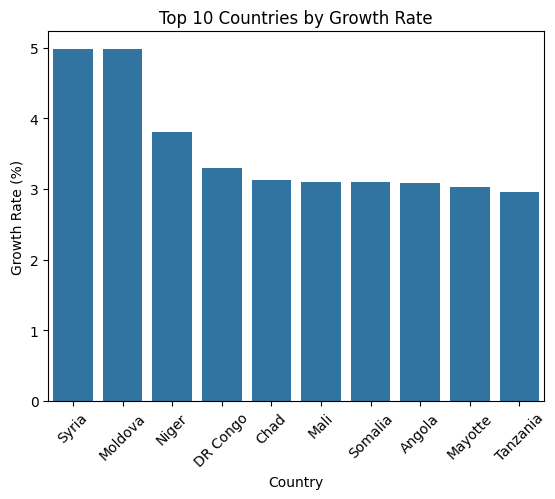

In [27]:
# Select the top 10 countries with the highest growth rate
top_10_countries_growth = df.nlargest(10, 'growth rate')

# Plotting a bar chart using Seaborn to visualize the growth rate of the top 10 countries with the highest growth
sns.barplot(x='country', y='growth rate', data=top_10_countries_growth)

# Setting the title of the plot
plt.title('Top 10 Countries by Growth Rate')

# Adding labels to the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Top 10 countries with least growth rate

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ukraine'),
  Text(1, 0, 'Lebanon'),
  Text(2, 0, 'Bulgaria'),
  Text(3, 0, 'Lithuania'),
  Text(4, 0, 'Latvia'),
  Text(5, 0, 'Serbia'),
  Text(6, 0, 'American Samoa'),
  Text(7, 0, 'United States Virgin Islands'),
  Text(8, 0, 'Bosnia and Herzegovina'),
  Text(9, 0, 'Wallis and Futuna')])

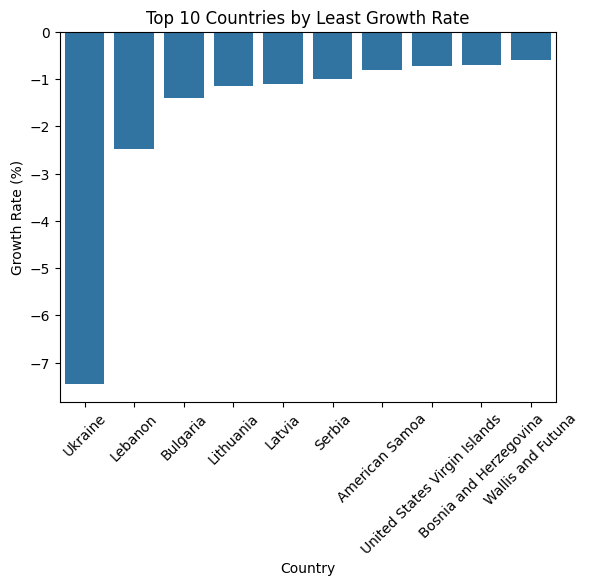

In [26]:
# Select the top 10 countries with the least growth rate
top_10_countries_least_growth = df.nsmallest(10, 'growth rate')

# Plotting a bar chart using Seaborn to visualize the growth rate of the top 10 countries with the least growth
sns.barplot(x='country', y='growth rate', data=top_10_countries_least_growth)

# Setting the title of the plot
plt.title('Top 10 Countries by Least Growth Rate')

# Adding labels to the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Let's check the top 10 countries with largest area

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Russia'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Argentina'),
  Text(8, 0, 'Kazakhstan'),
  Text(9, 0, 'Algeria')])

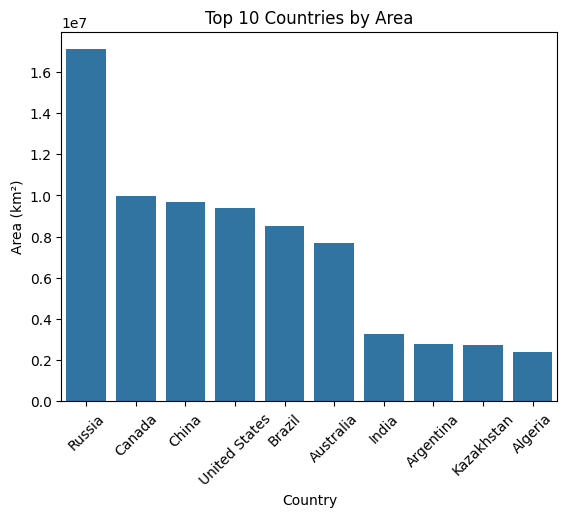

In [25]:
# Select the top 10 countries with the largest area
top_10_countries_area = df.nlargest(10, 'area (km²)')

# Plotting a bar chart using Seaborn to visualize the area of the top 10 countries
sns.barplot(x='country', y='area (km²)', data=top_10_countries_area)

# Setting the title of the plot
plt.title('Top 10 Countries by Area')

# Adding labels to the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Area (km²)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Let's check the top 10 countries with highest density

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Macau'),
  Text(1, 0, 'Monaco'),
  Text(2, 0, 'Singapore'),
  Text(3, 0, 'Hong Kong'),
  Text(4, 0, 'Gibraltar'),
  Text(5, 0, 'Bahrain'),
  Text(6, 0, 'Maldives'),
  Text(7, 0, 'Malta'),
  Text(8, 0, 'Bangladesh'),
  Text(9, 0, 'Sint Maarten')])

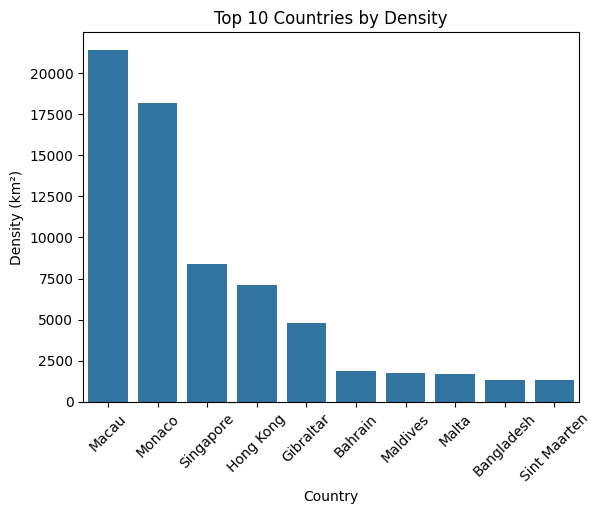

In [24]:
# Select the top 10 countries with the highest population density
top_10_countries_density = df.nlargest(10, 'density (km²)')

# Plotting a bar chart using Seaborn to visualize the population density of the top 10 countries
sns.barplot(x='country', y='density (km²)', data=top_10_countries_density)

# Setting the title of the plot
plt.title('Top 10 Countries by Density')

# Adding labels to the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Density (km²)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Let's plot the world population with respect to country

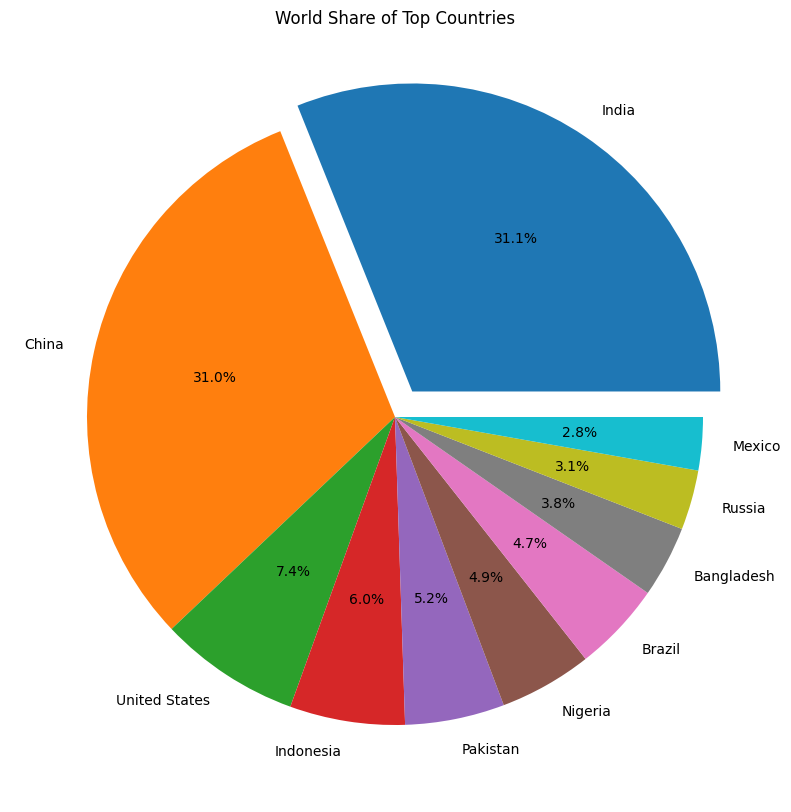

In [23]:
# Sort the DataFrame by 'world percentage' in descending order
df = df.sort_values(by='world percentage', ascending=False)

# Display the sorted DataFrame
# This step is not necessary for the plot but might be useful for inspection
df

# Plot a pie chart for world share using the top 10 countries with the highest world percentage
plt.figure(figsize=(10, 10))

# Create a pie chart with country names as labels, percentages, and explode the first slice for emphasis
plt.pie(df['world percentage'][:10], labels=df['country'][:10], autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# Set the title of the pie chart
plt.title('World Share of Top Countries')

# Display the pie chart
plt.show()


Aggregating data by region/continent

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'South America')])

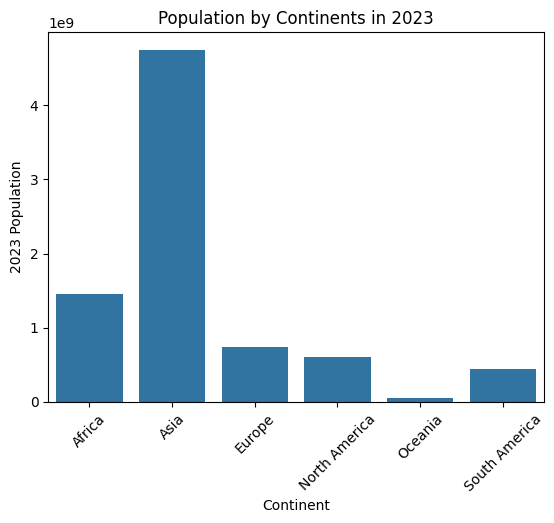

In [21]:
# Group the DataFrame by continent and calculate the sum of each numeric column for each continent
grouped_data_by_continent = df.groupby('continent').sum()

# Display the grouped data by continent
grouped_data_by_continent

# Extract the population for the year 2023 and sort by descending order
population_by_continent = grouped_data_by_continent['2023 population'].sort_values(ascending=False)

# Display the population by continent
population_by_continent

# Plotting a bar chart using Seaborn to visualize population by continent in 2023
sns.barplot(x='continent', y='2023 population', data=grouped_data_by_continent)

# Setting the title of the plot
plt.title('Population by Continents in 2023')

# Adding labels to the x-axis and y-axis
plt.xlabel('Continent')
plt.ylabel('2023 Population')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

Let's plot a correlation matrix with the attributes area, density, world percentage and 2023 population

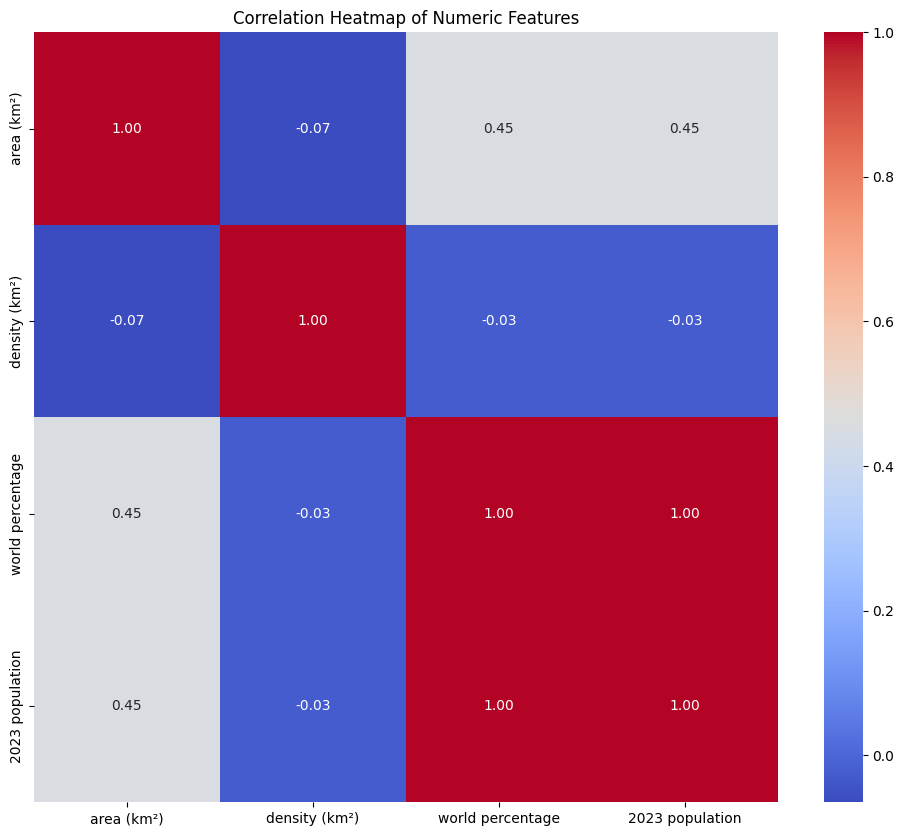

In [20]:
# Now we can calculate the correlation matrix

# Selecting numeric columns for correlation calculation
numeric_columns = df[['area (km²)', 'density (km²)', 'world percentage', '2023 population']].select_dtypes(include=[np.number]).columns

# Calculating the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))

# Using seaborn to create a heatmap with correlation values annotated
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Setting plot title
plt.title('Correlation Heatmap of Numeric Features')

# Displaying the heatmap
plt.show()

Plot which shows the change of population across years for the top countries

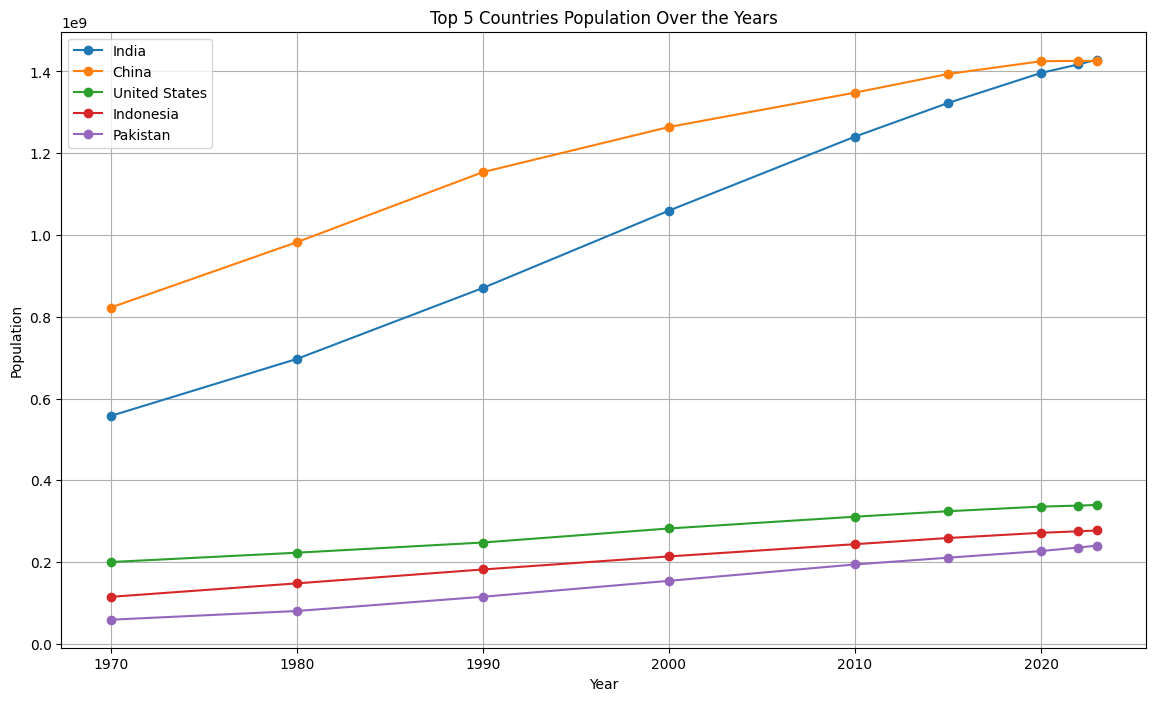

In [19]:
# Define the columns related to population and years
population_columns = ['country', '2023 population', '2022 population', '2020 population', '2015 population', '2010 population', '2000 population', '1990 population', '1980 population', '1970 population']

# Sort the countries by their latest population and take the top 5
top_countries = df.sort_values(by='2023 population', ascending=False).head(5)

# Melt the dataframe to have years and population as separate columns for plotting
melted_top_countries = pd.melt(top_countries, id_vars=['country'], value_vars=population_columns[1:], var_name='Year', value_name='Population')

# Convert 'Year' to a numerical value by extracting the first 4 characters and converting to integer
melted_top_countries['Year'] = melted_top_countries['Year'].str.extract('(\d{4})').astype(int)

# Plotting
plt.figure(figsize=(14, 8))

# Plot each country's population over the years
for country in melted_top_countries['country'].unique():
    country_data = melted_top_countries[melted_top_countries['country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], marker='o', label=country)

# Set plot title, x-axis label, y-axis label, legend, and display grid
plt.title('Top 5 Countries Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
